<a href="https://colab.research.google.com/github/engineerinvestor/Finance-Education/blob/main/Portfolio_Switch_When_Does_it_Pay_Off%3F_A_Break_Even_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Switch: When Does it Pay Off? A Break-Even Analysis

Author: Engineer Investor [[GitHub](https://github.com/engineerinvestor)] [Twitter/X: [@egr_investor](https://twitter.com/egr_investor)]

Date: 01/15/2024

# **Introduction**

Welcome to this tutorial on analyzing the financial implications of switching investment portfolios, considering capital gains taxes and different expense ratios.  A common dilemma faced by investors is whether the potential benefits of moving to a portfolio with lower fees and potentially higher returns outweigh the immediate costs, particularly the capital gains tax incurred when selling existing investments. In this tutorial, we will walk through a Python-based analysis to determine the break-even point – the time horizon at which the benefits of switching portfolios surpass the initial tax hit and the continued performance of the current portfolio. We will use a practical example, taking into account variables such as current portfolio value, expected returns, expense ratios, unrealized capital gains, and the capital gains tax rate. By the end of this tutorial, you'll have a clear understanding of the calculations involved, and you will be able to visualize the portfolio growth over time using a time-series chart. We will also see how to interpret this chart to make informed investment decisions. Let's dive in!

# **Code**

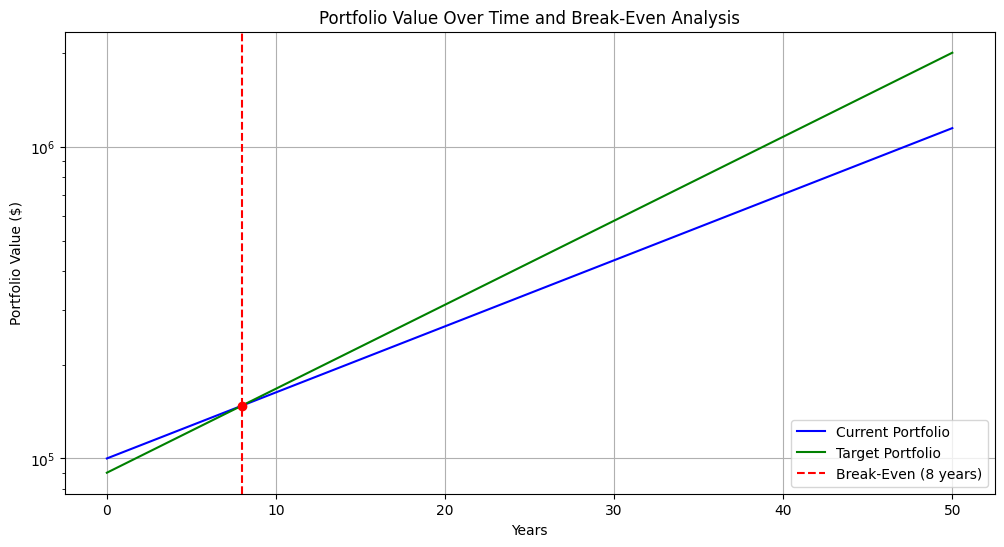

                                               Value
Tax Hit ($)                             10000.000000
Net Investable After Taxes ($)          90000.000000
Future Value of Current Portfolio ($)  162889.462678
Future Value of Target Portfolio ($)   167362.744500
Net Benefit ($)                          4473.281823
Break-Even Time Horizon (years)             8.000000


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inputs
PV_current = 100000  # Current portfolio value in dollars
ER_current = 0.01    # Annual expense ratio of current portfolio
r_current = 0.06     # Expected annual return of current portfolio

ER_target = 0.001    # Annual expense ratio of target portfolio
r_target = 0.065     # Expected annual return of target portfolio

T_CG = 0.20          # Capital gains tax rate
G_unrealized = 50000 # Unrealized capital gains in current portfolio
N = 10               # Investment horizon in years

# Calculations
Tax_Hit = G_unrealized * T_CG
PV_net = PV_current - Tax_Hit

# Future value calculations
FV_current = PV_current * (1 + (r_current - ER_current)) ** N
FV_target = PV_net * (1 + (r_target - ER_target)) ** N

Net_Benefit = FV_target - FV_current

# Break-even horizon calculation
def break_even_time(PV_current, ER_current, r_current, PV_net, ER_target, r_target):
    for n in range(1, 51):  # Search for break-even within 50 years
        FV_curr = PV_current * (1 + (r_current - ER_current)) ** n
        FV_targ = PV_net * (1 + (r_target - ER_target)) ** n
        if FV_targ >= FV_curr:
            return n
    return None

Break_Even_Horizon = break_even_time(PV_current, ER_current, r_current, PV_net, ER_target, r_target)

# Results
results = {
    "Tax Hit ($)": Tax_Hit,
    "Net Investable After Taxes ($)": PV_net,
    "Future Value of Current Portfolio ($)": FV_current,
    "Future Value of Target Portfolio ($)": FV_target,
    "Net Benefit ($)": Net_Benefit,
    "Break-Even Time Horizon (years)": Break_Even_Horizon
}

# Display results as a DataFrame for clarity
results_df = pd.DataFrame.from_dict(results, orient='index', columns=["Value"])

# Time-series data for plotting
years = np.arange(0, 51)  # Up to 50 years
fv_current_ts = [PV_current * (1 + (r_current - ER_current)) ** n for n in years]
fv_target_ts = [PV_net * (1 + (r_target - ER_target)) ** n for n in years]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(years, fv_current_ts, label='Current Portfolio', color='blue')
plt.plot(years, fv_target_ts, label='Target Portfolio', color='green')

# Highlight the break-even point
if Break_Even_Horizon is not None:
    plt.axvline(x=Break_Even_Horizon, color='red', linestyle='--', label=f'Break-Even ({Break_Even_Horizon} years)')
    plt.semilogy(Break_Even_Horizon, fv_current_ts[Break_Even_Horizon], 'ro')

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time and Break-Even Analysis')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#print results
print(results_df)

In [6]:
results_df

,Value
Tax Hit ($),10000.000000
Net Investable After Taxes ($),90000.000000
Future Value of Current Portfolio ($),162889.462678
Future Value of Target Portfolio ($),167362.744500
Net Benefit ($),4473.281823
Break-Even Time Horizon (years),8.000000


# **Conclusion**

In this tutorial, we explored a powerful method for evaluating the financial viability of switching investment portfolios. We meticulously calculated the future values of both the current and target portfolios, taking into account the crucial impact of capital gains tax. By determining the break-even horizon, we gained insight into the time it takes for the target portfolio to outperform the current one, effectively offsetting the initial tax burden. The time-series chart we generated provides a clear visual representation of this dynamic, illustrating the growth trajectories and the pivotal break-even point.

This analysis underscores the importance of a long-term perspective when making investment decisions. While the immediate cost of capital gains tax can be significant, the benefits of lower expense ratios and potentially higher returns can compound substantially over time. The break-even analysis serves as a valuable tool, helping investors to quantify this trade-off and to select a strategy aligned with their investment horizon and financial goals.

Remember, the specific inputs used in this tutorial are illustrative. You can adapt the code and apply this methodology to your own portfolio situation by modifying the input variables. This will enable you to perform a personalized analysis and make more informed decisions about your investments. We hope this tutorial has provided you with a solid foundation for understanding and applying break-even analysis in the context of portfolio management. You can now confidently use these tools to help navigate your own financial future.